### Classification:
* Categorising the data depending upon the features that they are having..
* There are two types of c;assifications:
    * Linear classification
        * Logistic Regression
        * Suport vector machines
    * Non - linear classification
        * K-nearest neighbour
        * Kernel svm
        * Navies Bayes
        * Decision Tree Classification
        * Random Forest Classifiction
        

### Logistic Regression:

In [1]:
### import libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
### loading the dataset
data = pd.read_csv("https://raw.githubusercontent.com/AP-Skill-Development-Corporation/Tirumala-ML/main/Day-5/diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
## getting info dataset:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
### splitting of the dataset:
Features_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = data[Features_cols]
y = data['Outcome']

In [7]:
### 75% of data is assigning as training dataset and 25% of data is assigning as the testing dataset.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)


In [11]:
## importing Logistic model:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)


C:\Users\Niharikaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
y_predict = logreg.predict(X_test)

In [13]:
y_predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
## Checking the ,metrics

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_predict)
cnf_matrix

array([[119,  11],
       [ 26,  36]], dtype=int64)

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predict))
print("precision:",metrics.precision_score(y_test,y_predict))
print("recall:",metrics.recall_score(y_test,y_predict))

Accuracy: 0.8072916666666666
precision: 0.7659574468085106
recall: 0.5806451612903226


In [16]:
(119+36)/(119+11+26+36)

0.8072916666666666

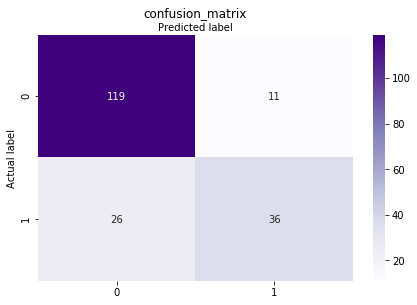

In [30]:
class_names = [0,1]
fid,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot = True,cmap = "Purples",fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("confusion_matrix")
plt.show()

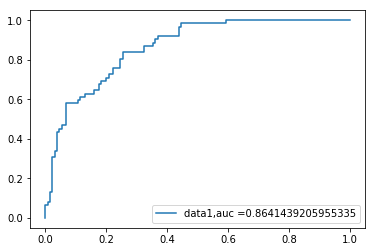

In [31]:
y_predict_proba = logreg.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_predict_proba)
auc = metrics.roc_auc_score(y_test,y_predict_proba)
plt.plot(fpr,tpr,label = "data1,auc ="+str(auc))
plt.legend(loc = "best")
plt.show()